# Imports

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
# %pip install dataframe-image

In [141]:
import dataframe_image as dfi

In [142]:
insurance_df = pd.read_excel('Motor RP Analyst Interview Activity.xlsx', sheet_name='Data')
insurance_df.head()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
0,16042,2019-02-28,0.002740,0.00000,0.0000,0,NaN,NaN,NaN,NaN,...,FIAT,20,20,1,MANUAL,East Midlands,Male,2019-02-01 00:00:00,2016-11-26,Blue
1,41414,2019-03-20,1.000000,238.33650,238.3365,0,NaN,NaN,NaN,NaN,...,FORD,25,25,1,MANUAL,South East,Female,2017-11-01 00:00:00,2012-03-12,Grey
2,58837,2019-11-29,0.420765,77.31347,183.7450,0,NaN,NaN,NaN,NaN,...,PEUGEOT,42,42,1,MANUAL,West Midlands,Female,2016-09-01 00:00:00,1994-11-09,Silver
3,65415,2019-02-17,1.000000,494.98150,246.5586,0,NaN,NaN,NaN,NaN,...,NISSAN,31,31,1,AUTOMATIC,North West,Female,2019-02-16 00:00:00,2019-07-01,White
4,81565,2018-04-24,1.000000,120.05060,120.0506,0,NaN,NaN,NaN,NaN,...,KIA,61,61,1,MANUAL,South West,Male,2013-06-01 00:00:00,1974-04-07,Silver


# Quick Checks

In [143]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 40 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      100000 non-null  int64         
 1   start_date              100000 non-null  datetime64[ns]
 2   exposure                100000 non-null  float64       
 3   net_earned_premium      99978 non-null   float64       
 4   net_written_premium     100000 non-null  float64       
 5   claim_count             100000 non-null  int64         
 6   is_capped_incurred      7419 non-null    float64       
 7   incurred                7419 non-null    float64       
 8   capped_incurred         7419 non-null    float64       
 9   bi_incurred             7419 non-null    float64       
 10  ad_incurred             7419 non-null    float64       
 11  pd_incurred             7419 non-null    float64       
 12  th_incurred             7419 no

In [144]:
insurance_df.columns

Index(['id', 'start_date', 'exposure', 'net_earned_premium',
       'net_written_premium', 'claim_count', 'is_capped_incurred', 'incurred',
       'capped_incurred', 'bi_incurred', 'ad_incurred', 'pd_incurred',
       'th_incurred', 'ws_incurred', 'bi_count', 'ad_count', 'pd_count',
       'th_count', 'ws_count', 'business_provider', 'cover', 'voluntary_xs',
       'ncd', 'pncd', 'vehicle_use', 'entitlement', 'overnight_location',
       'vehicle_value', 'vehicle_annual_mileage', 'vehicle_age',
       'vehicle_make', 'd1_age', 'd1_residency_years', 'd1_is_uk_resident',
       'transmission', 'region', 'gender', 'vehicle_purchase_date',
       'licence_test_date', 'primary_car_colour'],
      dtype='object')

In [145]:
# Show all cols
insurance_df.describe()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,ws_count,voluntary_xs,ncd,vehicle_value,vehicle_annual_mileage,vehicle_age,d1_age,d1_residency_years,d1_is_uk_resident,licence_test_date
count,100000.000000,100000,100000.000000,99978.000000,100000.000000,100000.000000,7419.000000,7419.000000,7419.000000,7419.000000,...,7419.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,99993
mean,50000.500000,2019-03-20 00:31:23.520000256,0.719595,272.432194,364.273773,0.079340,0.001483,2797.004851,2589.680535,989.259222,...,0.256638,197.238500,5.449590,5525.167150,6878.596280,8.378470,39.937510,38.400150,0.92853,2002-08-24 07:05:07.065494656
min,1.000000,2018-04-01 00:00:00,0.002732,-1134.753000,0.000000,0.000000,0.000000,-1854.640000,-1854.640000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,17.000000,0.000000,0.00000,1958-03-04 00:00:00
25%,25000.750000,2018-09-15 00:00:00,0.439891,114.164475,181.881875,0.000000,0.000000,34.500000,34.500000,0.000000,...,0.000000,100.000000,2.000000,1695.000000,5000.000000,5.000000,26.000000,25.000000,1.00000,1994-05-24 00:00:00
50%,50000.500000,2019-03-21 00:00:00,0.937159,206.621700,284.771550,0.000000,0.000000,159.500000,159.500000,0.000000,...,0.000000,250.000000,6.000000,3745.000000,6000.000000,8.000000,38.000000,36.000000,1.00000,2003-05-02 00:00:00
75%,75000.250000,2019-09-09 00:00:00,1.000000,359.323175,455.693300,0.000000,0.000000,2868.070000,2868.070000,0.000000,...,1.000000,250.000000,9.000000,7100.000000,9000.000000,12.000000,51.000000,51.000000,1.00000,2013-03-29 00:00:00
max,100000.000000,2020-03-31 00:00:00,1.000000,3912.240000,4394.661000,4.000000,1.000000,489297.500000,55259.600000,478339.300000,...,3.000000,600.000000,9.000000,163995.000000,400000.000000,41.000000,118.000000,118.000000,1.00000,2020-09-30 00:00:00
std,28867.657797,NaN,0.344350,250.834453,281.664104,0.289941,0.038480,10651.871541,5338.339710,9691.253028,...,0.447479,136.849868,3.637053,5765.353771,4056.018302,4.680995,15.415234,16.449685,0.25761,NaN


In [146]:
## Check unique values in objects

def show_object_uniques(df):
    """
    Display all unique values for object (string/categorical) columns in a DataFrame.
    """
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nColumn: {col}")
        print("-" * (len(col) + 9))
        print(df[col].unique())
        

In [147]:
## Check unique values in objects
show_object_uniques(insurance_df)


Column: business_provider
--------------------------
['CTMDefaultCampaign' 'HDWebsiteDefaultCampaign' 'MSMDefaultCampaign'
 'QuotezoneDefaultCampaign' 'ConfusedDefaultCampaign'
 'GoCompareDefaultCampaign' 'Confused_ECI_IP' 'Unknown'
 'DefaultDefaultCampaign' 'PPC-BingDefaultCampaign' 'CTM_ECI_PC' 'CTM_ECI'
 'CTM_ECI_IP' 'TopCashBackDefaultCampaign'
 'Google_Brand-Gk-Hastings_Direct' 'Confused_ECI' 'CTM_ECI_Hastings'
 'InsurerDefaultCampaign' 'Google_Brand-Gk-Hastings_Direct-Mobile'
 'Confused_ECI_PC' 'uSwitchDefaultCampaign' 'Bing_Car_Brand'
 'QuidcoDefaultCampaign' 'ContactUsPage' 'Confused_ECI_Hastings'
 'IPWebsiteDefaultCampaign' 'PPC-GoogleDefaultCampaign'
 'Google_Car_Gdn/Sr' 'HDWebsiteMulticarTestOne'
 'Google_Generic-Car-Car_Type' 'Google_Car_Generic'
 'Google_Brand-Car_Insurance' 'Google_Car_Brand'
 'Google_Brand-Mobile-Van_Insurance-Exact' 'RenewalRebrokeDefaultCampaign'
 'Google_Brand-Remarketing-Brand' 'PCWebsiteDefaultCampaign'
 'MTARebrokeDefaultCampaign' 'Google_Brand-Gk

In [148]:
insurance_df.isnull().sum()

id                            0
start_date                    0
exposure                      0
net_earned_premium           22
net_written_premium           0
claim_count                   0
is_capped_incurred        92581
incurred                  92581
capped_incurred           92581
bi_incurred               92581
ad_incurred               92581
pd_incurred               92581
th_incurred               92581
ws_incurred               92581
bi_count                  92581
ad_count                  92581
pd_count                  92581
th_count                  92581
ws_count                  92581
business_provider             0
cover                         0
voluntary_xs                  0
ncd                           0
pncd                          0
vehicle_use                   0
entitlement                   0
overnight_location            0
vehicle_value                 0
vehicle_annual_mileage        0
vehicle_age                   0
vehicle_make                776
d1_age  

In [149]:
# Check cols with null net_earned_premium
insurance_df[insurance_df['net_earned_premium'].isnull()].head()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
12403,39729,2019-12-02,0.412568,NaN,0.0,0,NaN,NaN,NaN,NaN,...,FIAT,24,24,1,MANUAL,South West,Female,2019-03-01 00:00:00,2018-12-01,White
28675,34290,2018-12-01,0.564384,NaN,0.0,0,NaN,NaN,NaN,NaN,...,FORD,28,28,1,MANUAL,Scotland,Female,2017-07-01 00:00:00,2017-03-17,Black
29357,87570,2018-11-14,0.608219,NaN,0.0,0,NaN,NaN,NaN,NaN,...,CITROEN,45,45,1,MANUAL,North West,Male,2018-11-13 00:00:00,1998-11-13,Black
30700,80529,2018-09-13,1.000000,NaN,0.0,0,NaN,NaN,NaN,NaN,...,BMW,38,29,0,MANUAL,East Midlands,Male,2012-09-01 00:00:00,1998-08-30,Grey
31197,44999,2018-12-20,0.512329,NaN,0.0,0,NaN,NaN,NaN,NaN,...,FORD,50,50,1,MANUAL,West Midlands,Male,2018-11-01 00:00:00,2014-02-10,Silver


In [150]:
## Checking neagitve inccured values
insurance_df[insurance_df['incurred'] < 0].head()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
90,70381,2018-05-01,1.000000,218.1073,218.1073,1,0.0,-61.0,-61.0,0.0,...,FORD,40,40,1,MANUAL,East Midlands,Female,2018-04-16 00:00:00,2009-04-16,Blue
180,99011,2018-05-07,1.000000,267.2897,271.3575,1,0.0,-192.0,-192.0,0.0,...,BMW,62,62,1,MANUAL,North West,Female,2016-02-01 00:00:00,1998-04-25,White
487,5840,2018-04-07,1.000000,280.8841,237.0196,1,0.0,-84.5,-84.5,0.0,...,NISSAN,31,31,1,MANUAL,North West,Male,2018-04-01 00:00:00,2005-04-06,NaN
545,1677,2019-01-26,0.726027,650.7096,899.6513,1,0.0,-5.0,-5.0,0.0,...,VAUXHALL,23,23,1,MANUAL,East Midlands,Male,2018-08-01 00:00:00,2014-01-24,NaN
590,45603,2019-02-06,1.000000,302.1702,302.1702,1,0.0,-70.5,-70.5,0.0,...,NISSAN,31,31,1,MANUAL,South East,Female,2019-02-01 00:00:00,2005-02-09,NaN


In [151]:
# Check vehicle age with negative?? # Include all cols
pd.set_option("display.max_columns", None)
result = insurance_df[insurance_df['vehicle_age'] < 0].head(1)
# Reset option
print(result)
pd.reset_option("display.max_columns")

        id start_date  exposure  net_earned_premium  net_written_premium  \
363  97981 2018-09-12       1.0           1292.4962            1256.8816   

     claim_count  is_capped_incurred  incurred  capped_incurred  bi_incurred  \
363            1                 0.0   7917.35          7917.35          0.0   

     ad_incurred  pd_incurred  th_incurred  ws_incurred  bi_count  ad_count  \
363      2863.04      5054.31          0.0          0.0       0.0       1.0   

     pd_count  th_count  ws_count business_provider cover  voluntary_xs  ncd  \
363       1.0       0.0       0.0      Confused_ECI  COMP           500    0   

    pncd vehicle_use entitlement overnight_location  vehicle_value  \
363    N           S         IAC                  R          20000   

     vehicle_annual_mileage  vehicle_age vehicle_make  d1_age  \
363                    2000           -1          BMW      22   

     d1_residency_years  d1_is_uk_resident transmission  region gender  \
363                 

In [152]:
## Duplicate values
insurance_df[insurance_df.duplicated()]

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour


# EDA notes

### Notes
- Data dictionary mentions 42 columns while the data tab only has 40 columns.

### Null Values
Columns that contain null value:
- primary_car_colour
- region
- transmission
- vehicle_make
- net_earned_premium
    
- is_capped_incurred links to -> incurred, capped_incurred, bi_incurred, ad_incurred, pd_incurred, th_incurred, ws_incurred          
    bi_count, ad_count, pd_count, th_count, ws_count

### Unusual Values
    - Some vehicle ages are -1 ?
    - A vehicle value of 1 ?
    - Annual vehicle mileage of 400000 ?
    - d1 age and residency years of 118 ?
    - earned premiun and incurred at negative?

## Duplicates
    - None


# Checking Distribution

In [153]:
cols_to_check = [
    "vehicle_age",
    "vehicle_value",
    "vehicle_annual_mileage",
    "d1_age",
    "d1_residency_years"
]

# Show basic stats
insurance_df[cols_to_check].describe()


,vehicle_age,vehicle_value,vehicle_annual_mileage,d1_age,d1_residency_years
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,8.378470,5525.167150,6878.596280,39.937510,38.400150
std,4.680995,5765.353771,4056.018302,15.415234,16.449685
min,-1.000000,1.000000,0.000000,17.000000,0.000000
25%,5.000000,1695.000000,5000.000000,26.000000,25.000000
50%,8.000000,3745.000000,6000.000000,38.000000,36.000000
75%,12.000000,7100.000000,9000.000000,51.000000,51.000000
max,41.000000,163995.000000,400000.000000,118.000000,118.000000


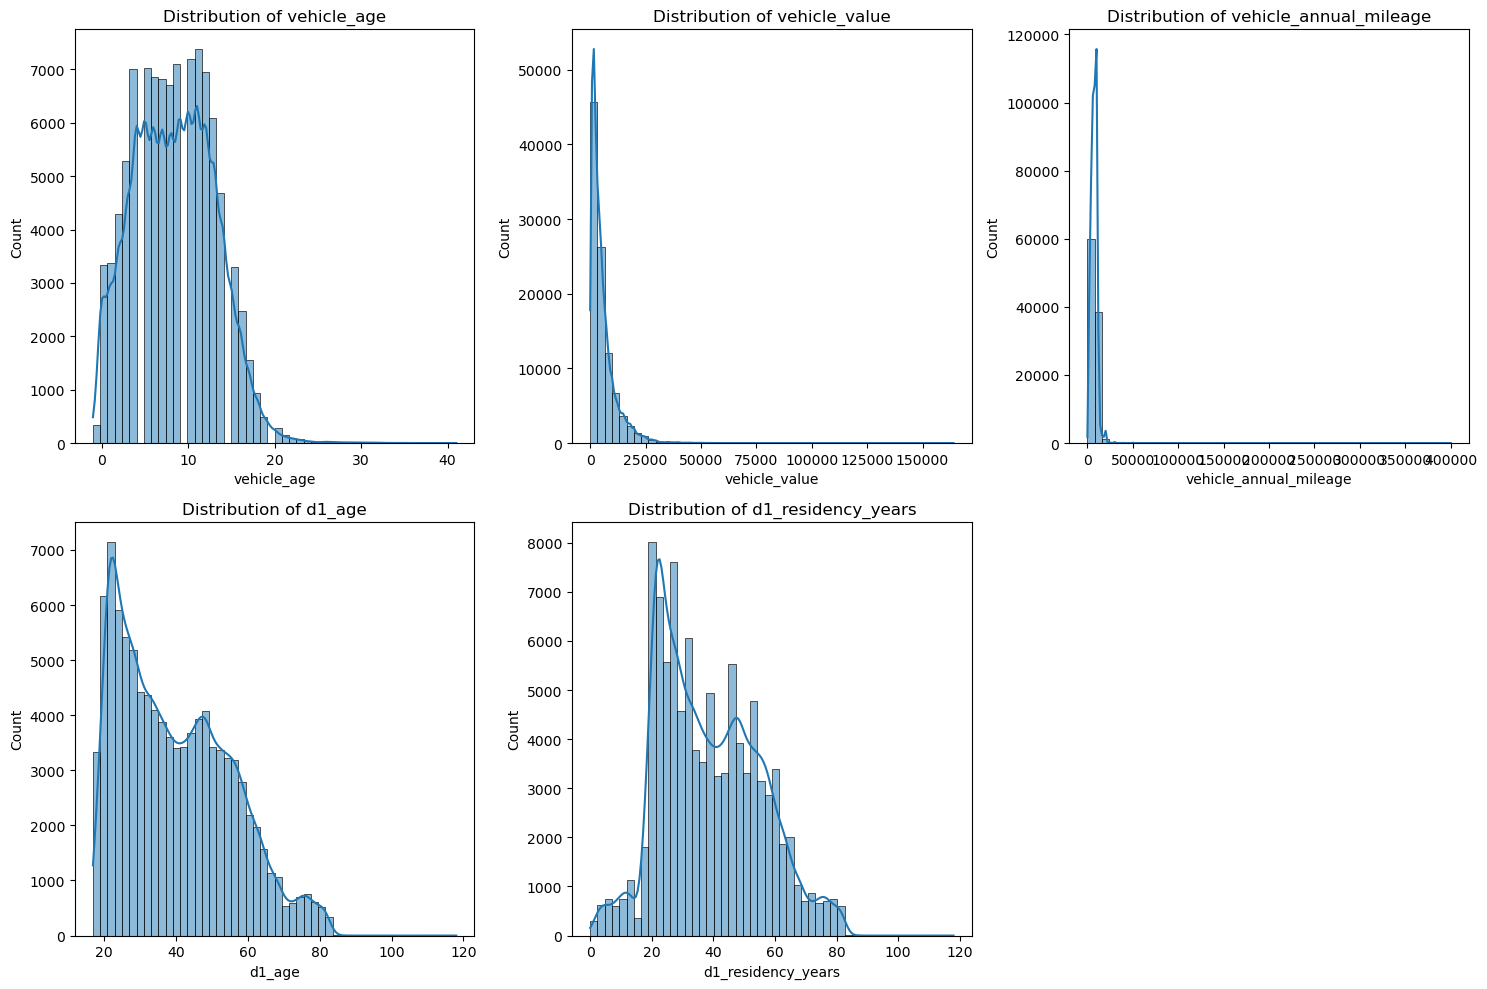

In [154]:
# Plot histograms for visual distribution
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(insurance_df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


### Note
- Found some dodgy values like -1 for vehicle age, 1 for vehicle value, 400k+ mileage, and 118-year-old drivers — clearly not legit.
- Checked distributions first to see if median made sense — most were skewed so median was safest.

# Cleaning Missing/Unusual Values

In [155]:
insurance_df_clean = insurance_df.copy()

In [156]:

def null_percentages(df):
    """
    Returns the percentage of missing values per column in a DataFrame,
    excluding columns with no nulls.
    """
    null_counts = df.isnull().sum()
    total_rows = len(df)
    null_percent = (null_counts / total_rows) * 100
    
    # Filter out columns with 0 nulls
    null_df = pd.DataFrame({
        'Null %': null_percent.round(2)
    })
    null_df = null_df[null_df['Null %'] > 0]

    return null_df.sort_values(by='Null %', ascending=False)

null_percentages(insurance_df)

,Null %
is_capped_incurred,92.58
incurred,92.58
capped_incurred,92.58
pd_count,92.58
bi_incurred,92.58
ad_incurred,92.58
pd_incurred,92.58
th_incurred,92.58
ws_incurred,92.58
bi_count,92.58


In [157]:
insurance_df_clean['is_capped_incurred'].unique()

array([nan,  0.,  1.])

In [158]:
incurred_cols = [
    "is_capped_incurred", "incurred", "capped_incurred",
    "pd_count", "bi_incurred", "ad_incurred", "pd_incurred",
    "th_incurred", "ws_incurred", "bi_count", "ad_count",
    "ws_count", "th_count"
]

In [159]:
for col in incurred_cols:
    insurance_df_clean[col] = insurance_df_clean[col].apply(lambda x: 0 if pd.isna(x) else x).astype(int)


In [160]:
insurance_df_clean['primary_car_colour'].unique()

array(['Blue', 'Grey', 'Silver', 'White', 'Black', 'Red', 'Beige', nan,
       'Green', 'Purple', 'Orange', 'Gold', 'Brown', 'Turquoise',
       'Bronze', 'Yellow', 'Maroon', 'Pink', 'Multi-colour', 'Cream'],
      dtype=object)

In [161]:
insurance_df_clean['primary_car_colour'] = insurance_df_clean['primary_car_colour'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [162]:
insurance_df_clean['vehicle_make'].unique()

array(['FIAT', 'FORD', 'PEUGEOT', 'NISSAN', 'KIA', 'VAUXHALL',
       'VOLKSWAGEN', 'TOYOTA', 'RENAULT', 'SKODA', 'CITROEN', 'HYUNDAI',
       'ALFA ROMEO', 'HONDA', 'BMW', 'AUDI', 'MERCEDES-BENZ', 'VOLVO',
       'CHRYSLER', nan, 'SMART', 'MINI', 'MAZDA', 'SSANGYONG', 'SEAT',
       'SUZUKI', 'SAAB', 'JAGUAR', 'MITSUBISHI', 'PORSCHE', 'SUBARU',
       'DACIA', 'CHEVROLET', 'LEXUS', 'DAEWOO', 'DODGE', 'MG-MOTOR UK',
       'LANDROVER', 'DS', 'ROVER', 'BMW320D', 'INFINITI', 'JEEP', 'MG',
       'PERODUA', 'DAIHATSU', 'DATSUN', 'AUSTIN', 'CADILLAC', 'PROTON',
       'FIAT500', 'JAGUARXE', 'ISUZU', 'MG-MOTOR UKZS', 'LOTUS',
       'TOYOTACOROLLA', 'OPEL', 'LEXUSUX', 'FIAT500C', 'AUDIQ5',
       'BMW320I', 'JAGUARF-PACE', 'TOYOTARAV-4', 'NAC MG', 'DAIMLER',
       'TESLA', 'FIATPANDA', 'FIAT500X'], dtype=object)

In [163]:
insurance_df_clean['vehicle_make'] = insurance_df_clean['vehicle_make'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [164]:
insurance_df_clean['transmission'].unique()

array(['MANUAL', 'AUTOMATIC', nan], dtype=object)

In [165]:
insurance_df_clean['transmission'] = insurance_df_clean['transmission'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [166]:
insurance_df_clean['region'].unique()

array(['East Midlands', 'South East', 'West Midlands', 'North West',
       'South West', 'London', 'Scotland', 'North', 'Yorkshire', 'Wales',
       'East Anglia', 'Outer London', 'N Ireland', nan], dtype=object)

In [167]:
insurance_df_clean['region'] = insurance_df_clean['region'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [168]:
# Check nan net earned premium
insurance_df_clean[insurance_df_clean['net_earned_premium'].isna()]

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
12403,39729,2019-12-02,0.412568,NaN,0.0,0,0,0,0,0,...,FIAT,24,24,1,MANUAL,South West,Female,2019-03-01 00:00:00,2018-12-01,White
28675,34290,2018-12-01,0.564384,NaN,0.0,0,0,0,0,0,...,FORD,28,28,1,MANUAL,Scotland,Female,2017-07-01 00:00:00,2017-03-17,Black
29357,87570,2018-11-14,0.608219,NaN,0.0,0,0,0,0,0,...,CITROEN,45,45,1,MANUAL,North West,Male,2018-11-13 00:00:00,1998-11-13,Black
30700,80529,2018-09-13,1.000000,NaN,0.0,0,0,0,0,0,...,BMW,38,29,0,MANUAL,East Midlands,Male,2012-09-01 00:00:00,1998-08-30,Grey
31197,44999,2018-12-20,0.512329,NaN,0.0,0,0,0,0,0,...,FORD,50,50,1,MANUAL,West Midlands,Male,2018-11-01 00:00:00,2014-02-10,Silver
33518,34292,2018-09-09,0.786301,NaN,0.0,0,0,0,0,0,...,RENAULT,39,39,1,MANUAL,Scotland,Female,2018-08-01 00:00:00,1998-08-16,Orange
34562,98830,2019-08-04,0.740437,NaN,0.0,0,0,0,0,0,...,VAUXHALL,25,25,1,MANUAL,South West,Female,2019-07-28 00:00:00,2015-07-27,Missing
38848,83779,2019-06-10,0.890710,NaN,0.0,0,0,0,0,0,...,MINI,21,21,1,MANUAL,South East,Male,2018-06-01 00:00:00,2017-11-02,Black
40022,59739,2018-11-27,1.000000,NaN,0.0,1,0,114,114,0,...,CITROEN,22,22,1,MANUAL,East Midlands,Female,2017-11-01 00:00:00,2014-03-31,Red
41601,46202,2020-01-17,0.286885,NaN,0.0,0,0,0,0,0,...,BMW,33,33,1,AUTOMATIC,South West,Female,2019-08-01 00:00:00,2007-10-30,Red


In [169]:
insurance_df_clean['premium_flag'] = np.where(
    insurance_df_clean['net_earned_premium'].isna(), 'Missing Premium', 'Normal'
)

### Notes
- Around 22 rows have missing premium but some still have exposure/claims. These could represent cancellations or system issues, and I flagged them separately rather than forcing values.

In [170]:
insurance_df_clean['licence_test_date'] = insurance_df_clean['licence_test_date'].apply(
    lambda x: 'Missing' if pd.isna(x) else x
)

In [171]:
null_percentages(insurance_df_clean)

,Null %
net_earned_premium,0.02


In [172]:
insurance_df_clean.head(3)

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour,premium_flag
0,16042,2019-02-28,0.002740,0.00000,0.0000,0,0,0,0,0,...,20,20,1,MANUAL,East Midlands,Male,2019-02-01 00:00:00,2016-11-26 00:00:00,Blue,Normal
1,41414,2019-03-20,1.000000,238.33650,238.3365,0,0,0,0,0,...,25,25,1,MANUAL,South East,Female,2017-11-01 00:00:00,2012-03-12 00:00:00,Grey,Normal
2,58837,2019-11-29,0.420765,77.31347,183.7450,0,0,0,0,0,...,42,42,1,MANUAL,West Midlands,Female,2016-09-01 00:00:00,1994-11-09 00:00:00,Silver,Normal


In [173]:
insurance_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      100000 non-null  int64         
 1   start_date              100000 non-null  datetime64[ns]
 2   exposure                100000 non-null  float64       
 3   net_earned_premium      99978 non-null   float64       
 4   net_written_premium     100000 non-null  float64       
 5   claim_count             100000 non-null  int64         
 6   is_capped_incurred      100000 non-null  int64         
 7   incurred                100000 non-null  int64         
 8   capped_incurred         100000 non-null  int64         
 9   bi_incurred             100000 non-null  int64         
 10  ad_incurred             100000 non-null  int64         
 11  pd_incurred             100000 non-null  int64         
 12  th_incurred             100000 

### Unusual values

In [174]:
insurance_df_clean.describe()

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,th_count,ws_count,voluntary_xs,ncd,vehicle_value,vehicle_annual_mileage,vehicle_age,d1_age,d1_residency_years,d1_is_uk_resident
count,100000.000000,100000,100000.000000,99978.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,2019-03-20 00:31:23.520000256,0.719595,272.432194,364.273773,0.079340,0.000110,207.492740,192.111390,73.392200,...,0.001640,0.019040,197.238500,5.449590,5525.167150,6878.596280,8.378470,39.937510,38.400150,0.92853
min,1.000000,2018-04-01 00:00:00,0.002732,-1134.753000,0.000000,0.000000,0.000000,-1854.000000,-1854.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,17.000000,0.000000,0.00000
25%,25000.750000,2018-09-15 00:00:00,0.439891,114.164475,181.881875,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.000000,2.000000,1695.000000,5000.000000,5.000000,26.000000,25.000000,1.00000
50%,50000.500000,2019-03-21 00:00:00,0.937159,206.621700,284.771550,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,250.000000,6.000000,3745.000000,6000.000000,8.000000,38.000000,36.000000,1.00000
75%,75000.250000,2019-09-09 00:00:00,1.000000,359.323175,455.693300,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,250.000000,9.000000,7100.000000,9000.000000,12.000000,51.000000,51.000000,1.00000
max,100000.000000,2020-03-31 00:00:00,1.000000,3912.240000,4394.661000,4.000000,1.000000,489297.000000,55259.000000,478339.000000,...,2.000000,3.000000,600.000000,9.000000,163995.000000,400000.000000,41.000000,118.000000,118.000000,1.00000
std,28867.657797,NaN,0.344350,250.834453,281.664104,0.289941,0.010488,2992.305881,1604.516849,2652.219751,...,0.040955,0.139204,136.849868,3.637053,5765.353771,4056.018302,4.680995,15.415234,16.449685,0.25761


In [175]:
## Vehicles with ages less than 0
insurance_df_clean.loc[insurance_df_clean['vehicle_age'] < 0, 'vehicle_age'].unique()

array([-1])

In [176]:
## Vehicle unusual values
insurance_df_clean.loc[insurance_df_clean['vehicle_value'] < 100, 'vehicle_value'].unique()

array([12, 95,  3,  8,  6,  5, 45, 20, 30,  9, 10,  4,  1, 11, 38])

In [177]:
## Vehicle mileage unusual values
insurance_df_clean.loc[insurance_df_clean['vehicle_annual_mileage'] > 100000, 'vehicle_annual_mileage'].unique()

array([143000, 106000, 400000, 129999, 120000])

In [178]:
## Vehicle mileage unusual values
insurance_df_clean.loc[insurance_df_clean['d1_age'] > 100, 'd1_age'].unique()

array([118])

In [179]:
insurance_df_clean.loc[insurance_df_clean['d1_age'] < 18, 'd1_age'].unique()

array([17])

In [180]:
# VEHICLE AGE
insurance_df_clean["vehicle_age"] = insurance_df_clean["vehicle_age"].replace(-1, np.nan)
insurance_df_clean["vehicle_age"] = insurance_df_clean["vehicle_age"].fillna(insurance_df_clean["vehicle_age"].median())

# VEHICLE VALUE
insurance_df_clean.loc[insurance_df_clean["vehicle_value"] < 100, "vehicle_value"] = np.nan
insurance_df_clean["vehicle_value"] = insurance_df_clean["vehicle_value"].fillna(insurance_df_clean["vehicle_value"].median())

# VEHICLE ANNUAL MILEAGE
insurance_df_clean.loc[insurance_df_clean["vehicle_annual_mileage"] > 200_000, "vehicle_annual_mileage"] = np.nan
insurance_df_clean["vehicle_annual_mileage"] = insurance_df_clean["vehicle_annual_mileage"].fillna(insurance_df_clean["vehicle_annual_mileage"].median())

# D1 AGE
insurance_df_clean.loc[(insurance_df_clean["d1_age"] < 16) | (insurance_df_clean["d1_age"] > 100), "d1_age"] = np.nan
insurance_df_clean["d1_age"] = insurance_df_clean["d1_age"].fillna(insurance_df_clean["d1_age"].median())

# D1 RESIDENCY YEARS
insurance_df_clean.loc[insurance_df_clean["d1_residency_years"] > 100, "d1_residency_years"] = np.nan
insurance_df_clean["d1_residency_years"] = insurance_df_clean["d1_residency_years"].fillna(insurance_df_clean["d1_residency_years"].median())


In [181]:
## Vehicles with ages less than 0
insurance_df_clean.loc[insurance_df_clean['vehicle_age'] < 0, 'vehicle_age'].unique()

array([], dtype=float64)

In [182]:
## Vehicle unusual values
insurance_df_clean.loc[insurance_df_clean['vehicle_value'] < 100, 'vehicle_value'].unique()

array([], dtype=float64)

In [183]:
## Vehicle mileage unusual values
insurance_df_clean.loc[insurance_df_clean['vehicle_annual_mileage'] > 200000, 'vehicle_annual_mileage'].unique()

array([], dtype=float64)

In [184]:
## Vehicle mileage unusual values
insurance_df_clean.loc[insurance_df_clean['d1_age'] > 100, 'd1_age'].unique()

array([], dtype=float64)

In [185]:
insurance_df_clean.loc[insurance_df_clean['d1_age'] < 16, 'd1_age'].unique()

array([], dtype=float64)

In [186]:
insurance_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      100000 non-null  int64         
 1   start_date              100000 non-null  datetime64[ns]
 2   exposure                100000 non-null  float64       
 3   net_earned_premium      99978 non-null   float64       
 4   net_written_premium     100000 non-null  float64       
 5   claim_count             100000 non-null  int64         
 6   is_capped_incurred      100000 non-null  int64         
 7   incurred                100000 non-null  int64         
 8   capped_incurred         100000 non-null  int64         
 9   bi_incurred             100000 non-null  int64         
 10  ad_incurred             100000 non-null  int64         
 11  pd_incurred             100000 non-null  int64         
 12  th_incurred             100000 

# Export Clean data

### Clean data is only for Tableau use

In [187]:
## Export Clean data
insurance_df_clean.to_csv('insurance_data_clean.csv', index=False)

In [188]:
test_df = pd.read_csv('insurance_data_clean.csv', dtype=str)
test_df.shape

(100000, 41)

# Section 1

### Claim Count

In [189]:
# Unique values in claim count including objects
insurance_df['claim_count'].unique()

array([0, 1, 2, 3, 4])

In [190]:
claim_count = (insurance_df['claim_count']).sum()
claim_count

7934

In [191]:
## More than one claim?
claim_count = (insurance_df['claim_count'] > 1).sum()
claim_count

482

### Average value of claim

In [192]:
# Average claim without cap check
average_claim = insurance_df[insurance_df['claim_count'] > 0]['incurred'].mean()
average_claim

2797.0048510580937

In [193]:
# Average claim without cap check
average_claim = insurance_df[insurance_df['claim_count'] > 0]['capped_incurred'].mean()
average_claim

2589.680535112549

In [194]:
summary = (insurance_df.assign(
              start_date=pd.to_datetime(insurance_df['start_date'], errors='coerce'),
              year=lambda d: d['start_date'].dt.year)
           .groupby('year', dropna=True)
           .agg(covers_started=('id','count'),
                claim_count=('claim_count','sum'),
                earned_premium=('net_earned_premium','sum'),
                written_premium=('net_written_premium','sum'))
           .reset_index()
           .rename(columns={'year':'Year',
                            'covers_started':'Covers Started',
                            'claim_count':'Claim Count',
                            'earned_premium':'Earned Premium',
                            'written_premium':'Written Premium'})
           .sort_values('Year')
          )

# Display in £ millions with 2 dp (keep counts as ints)
summary_present = summary.copy()
summary_present['Earned Premium (£m)']  = (summary_present['Earned Premium']/1e6).round(2)
summary_present['Written Premium (£m)'] = (summary_present['Written Premium']/1e6).round(2)
summary_present[['Covers Started','Claim Count']] = summary_present[['Covers Started','Claim Count']].astype(int)

# Final columns (readable)
summary_present = summary_present[['Year','Covers Started','Claim Count',
                                   'Earned Premium (£m)','Written Premium (£m)']]
summary_present


,Year,Covers Started,Claim Count,Earned Premium (£m),Written Premium (£m)
0,2018,38539,4065,13.37,14.65
1,2019,49808,3700,13.07,17.70
2,2020,11653,169,0.79,4.08


# Biggest Factors

In [195]:
insurance_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      100000 non-null  int64         
 1   start_date              100000 non-null  datetime64[ns]
 2   exposure                100000 non-null  float64       
 3   net_earned_premium      99978 non-null   float64       
 4   net_written_premium     100000 non-null  float64       
 5   claim_count             100000 non-null  int64         
 6   is_capped_incurred      100000 non-null  int64         
 7   incurred                100000 non-null  int64         
 8   capped_incurred         100000 non-null  int64         
 9   bi_incurred             100000 non-null  int64         
 10  ad_incurred             100000 non-null  int64         
 11  pd_incurred             100000 non-null  int64         
 12  th_incurred             100000 

In [196]:
df = insurance_df_clean.copy()
df = df[(df["claim_count"] > 0) & df["capped_incurred"].notna() & (df["capped_incurred"] > 0)]
df["claim_size"] = df["capped_incurred"] / df["claim_count"]

def avg_claim_size_by(factor):
    """
    Calculate average (weighted) and median claim size by a given factor.
    Keeps structure close to your original.
    """
    grouped = (
        df.groupby(factor, dropna=False)
          .agg(
              total_incurred=("capped_incurred", "sum"),
              total_claims=("claim_count", "sum"),
              median_claim_size=("claim_size", "median")  # typical (skew-robust)
          )
    )
    # avoid divide-by-zero & negatives
    grouped = grouped[grouped["total_claims"] > 0]
    grouped["avg_claim_size"] = grouped["total_incurred"] / grouped["total_claims"]
    grouped = grouped[grouped["avg_claim_size"] > 0]
    return grouped.sort_values("avg_claim_size", ascending=False)

factors = [
    "cover","region","d1_age","vehicle_value","vehicle_age","ncd","pncd",
    "overnight_location","vehicle_make","transmission","primary_car_colour",
    "business_provider","voluntary_xs","vehicle_annual_mileage",
    "entitlement","d1_residency_years","d1_is_uk_resident","gender"
]

summary = []

for factor in factors:
    table = avg_claim_size_by(factor)

    min_val = table["avg_claim_size"].min()
    max_val = table["avg_claim_size"].max()
    spread  = max_val - min_val
    overall_median = table["median_claim_size"].median()  # median of category medians

    summary.append({
        "Factor": factor,
        "Min Avg Claim Size": round(min_val, 2),
        "Max Avg Claim Size": round(max_val, 2),
        "Spread": round(spread, 2),
        "Median (overall)": round(overall_median, 2)
    })

summary_df = pd.DataFrame(summary).sort_values("Spread", ascending=False).reset_index(drop=True)

In [197]:
top5 = summary_df.head(5)
top5

,Factor,Min Avg Claim Size,Max Avg Claim Size,Spread,Median (overall)
0,vehicle_value,1.0,49995.00,49994.00,1055.75
1,vehicle_annual_mileage,22.5,35166.00,35143.50,916.42
2,vehicle_age,1247.5,12484.00,11236.50,1327.50
3,vehicle_make,50.0,8572.71,8522.71,866.00
4,business_provider,130.0,6159.00,6029.00,916.00


# Formating for presentation

In [198]:
present_top5 = summary_df.head(5).copy().rename(columns={
    "Factor": "Factor",
    "Min Avg Claim Size": "Min Avg (£)",
    "Max Avg Claim Size": "Max Avg (£)",
    "Spread": "Spread (£)",
    "Median (overall)": "Median (£)"
})[["Factor", "Min Avg (£)", "Max Avg (£)", "Spread (£)", "Median (£)"]]

# ✨ PRETTIFY factor text
present_top5["Factor"] = (
    present_top5["Factor"]
        .astype(str)
        .str.replace("_", " ")
        .str.title()  
)

money_fmt = "£{:,.1f}"
ACCENT = "#2563eb"

styled = (
    present_top5.style
        .hide(axis="index")
        .format({
            "Min Avg (£)": money_fmt,
            "Max Avg (£)": money_fmt,
            "Spread (£)": money_fmt,
            "Median (£)": money_fmt
        })
        # alignments
        .set_properties(subset=["Factor"], **{"text-align": "left"})
        .set_properties(subset=["Min Avg (£)", "Max Avg (£)", "Median (£)"],
                        **{"text-align": "right"})
        # highlight spread
        .set_properties(subset=["Spread (£)"], **{"text-align": "right",
                                                  "color": ACCENT,
                                                  "font-weight": "700"})
        # 🔴 nicer factor text styling
        .set_properties(subset=["Factor"], **{
            "color": "#d32f2f",              # softer red
            "font-weight": "600",
            "text-decoration": "none",
            "font-family": "Helvetica, Arial, sans-serif"
        })
)

dfi.export(styled, "top5_claim_factors.png", table_conversion="matplotlib", dpi=300)
print("Saved PNG -> top5_claim_factors.png")


Saved PNG -> top5_claim_factors.png


In [199]:
present_bottom5 = summary_df.tail(5).copy().rename(columns={
    "Factor": "Factor",
    "Min Avg Claim Size": "Min Avg (£)",
    "Max Avg Claim Size": "Max Avg (£)",
    "Spread": "Spread (£)",
    "Median (overall)": "Median (£)"
})[["Factor", "Min Avg (£)", "Max Avg (£)", "Spread (£)", "Median (£)"]]

# ✨ PRETTIFY factor text
present_bottom5["Factor"] = (
    present_bottom5["Factor"]
        .astype(str)
        .str.replace("_", " ")
        .str.title()  
)

money_fmt = "£{:,.1f}"
ACCENT = "#2563eb"

styled_bottom = (
    present_bottom5.style
        .hide(axis="index")
        .format({
            "Min Avg (£)": money_fmt,
            "Max Avg (£)": money_fmt,
            "Spread (£)": money_fmt,
            "Median (£)": money_fmt
        })
        # alignments
        .set_properties(subset=["Factor"], **{"text-align": "left"})
        .set_properties(subset=["Min Avg (£)", "Max Avg (£)", "Median (£)"],
                        **{"text-align": "right"})
        # highlight spread
        .set_properties(subset=["Spread (£)"], **{"text-align": "right",
                                                  "color": ACCENT,
                                                  "font-weight": "700"})
        # 🔴 nicer factor text styling
        .set_properties(subset=["Factor"], **{
            "color": "#d32f2f",
            "font-weight": "600",
            "text-decoration": "none",
            "font-family": "Helvetica, Arial, sans-serif"
        })
)

dfi.export(styled_bottom, "bottom5_claim_factors.png", table_conversion="matplotlib", dpi=300)
print("Saved PNG -> bottom5_claim_factors.png")


Saved PNG -> bottom5_claim_factors.png


In [55]:
# For section 1 Question 3
null_percentages(insurance_df)

,Null %
is_capped_incurred,92.58
incurred,92.58
capped_incurred,92.58
pd_count,92.58
bi_incurred,92.58
ad_incurred,92.58
pd_incurred,92.58
th_incurred,92.58
ws_incurred,92.58
bi_count,92.58
